In [ ]:
# Testing for GPU availability
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df_train=pd.read_csv('/content/gdrive/MyDrive/DIP/train.csv',dtype=str)
df_test=pd.read_csv('/content/gdrive/MyDrive/DIP/test.csv',dtype=str)
df_train.head()


id_code diagnosis
0  000c1434d8d7         2
1  001639a390f0         4
2  0024cdab0c1e         1
3  002c21358ce6         0
4  005b95c28852         0

In [ ]:
train=pd.read_csv('/content/gdrive/MyDrive/DIP/train.csv',dtype=str)
test=pd.read_csv('/content/gdrive/MyDrive/DIP/test.csv',dtype=str)
train.head()

id_code diagnosis
0  000c1434d8d7         2
1  001639a390f0         4
2  0024cdab0c1e         1
3  002c21358ce6         0
4  005b95c28852         0

In [ ]:
from PIL import Image
from PIL import ImageFilter
import os
from random import sample
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.layers import Dense,Input,Flatten
from tensorflow.keras.models import Model 
from sklearn.metrics import  confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.resnet50 import ResNet50
import os, sys
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df_train['id_code']=df_train['id_code'].map(lambda x:'/content/gdrive/MyDrive/DIP/train_imagesf/'+x+'.png')

In [ ]:
print(len(df_train),len(df_test))

3662 1928


Text(0.5, 1.0, 'Histogram of Dataset')

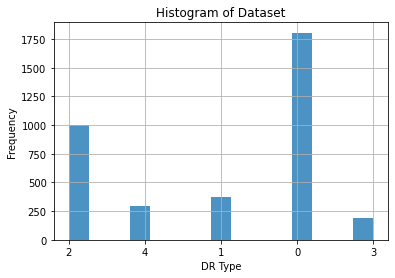

In [ ]:
df_train['diagnosis'].hist(bins=15, alpha=0.8,figsize=(6,4))
plt.xlabel('DR Type')
plt.ylabel('Frequency')
plt.title('Histogram of Dataset')

In [ ]:
size=150
b_size=16
IMG_SIZE = 512


In [ ]:
train_0=train[train['diagnosis']!=str(0)]
train_rest=train_0[train_0['diagnosis']!=str(2)]

In [ ]:
a=[]
for i in range(len(train_rest)):
    a.append(i)
temp=sample(a,700)

In [ ]:
import numpy as np
import pandas as pd
import random

import os
path_in = "/content/gdrive/MyDrive/DIP/"
print(os.listdir(path_in))


['sample_submission.csv', 'test.csv', 'train.csv', 'test_images', 'train_imagesf']


In [ ]:
path = "/content/gdrive/MyDrive/DIP/"

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Activation
from keras.optimizers import RMSprop,Adam
from keras.applications import VGG19

In [ ]:
q_size = 150
img_channel = 3
num_classes = 5

In [ ]:
size = 150
channels = 3
num_classes = 5

In [ ]:
train_data = pd.read_csv(path_in+'train.csv')
test_data = pd.read_csv(path_in+'test.csv')
sub_org = pd.read_csv(path_in+'sample_submission.csv')


In [ ]:
train_df = pd.read_csv(path+'train.csv')
test_df = pd.read_csv(path+'test.csv')
sub_org = pd.read_csv(path+'sample_submission.csv')

In [ ]:
def plot_bar(data):
    dict_data = dict(zip(range(0, num_classes), (((data.value_counts()).sort_index())).tolist()))
    names = list(dict_data.keys())
    values = list(dict_data.values())
    plt.bar(names, values,color='red')
    plt.show()


In [ ]:
def read_images(filepath, data, file_list, size):
    for file in file_list:
        img = cv2.imread(filepath+file+'.png')
        img = cv2.resize(img, (size, size))
        img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), 10), -4, 128)
        data[file_list.index(file), :, :, :] = img

In [ ]:
def add_flip_image(data, file_list):
    temp = np.empty((1, data.shape[1], data.shape[2], data.shape[3]), dtype=np.uint8)
    for index in file_list.index:
        img = data[index, :, :, :]
        vertical_img = cv2.flip(img, 1)
        temp[0, :, :, :] = vertical_img
        data = np.concatenate((data, temp), axis=0)
    return data

In [ ]:
def add_rot_image(data, file_list):
    degrees = 20
    temp = np.empty((1, data.shape[1], data.shape[2], data.shape[3]), dtype=np.uint8)
    for index in file_list.index:
        img = data[index, :, :, :]
        rows,cols, channel = img.shape
        Matrix = cv2.getRotationMatrix2D((cols/2,rows/2), degrees, 1)
        rotate_img = cv2.warpAffine(img, Matrix, (cols, rows))
        temp[0, :, :, :] = rotate_img
        data = np.concatenate((data, temp), axis=0)
    return data

In [ ]:
def add_zoom_image(data, file_list):
    temp = np.empty((1, data.shape[1], data.shape[2], data.shape[3]), dtype=np.uint8)
    for index in file_list.index:
        img = data[index, :, :, :]
        size = img.shape[0]
        pts1 = np.float32([[10,10],[size-10, 10],[10, size-10],[size-10, size-10]])
        pts2 = np.float32([[0, 0],[size-20, 0],[0, size-20],[size-20, size-20]])
        Matrix = cv2.getPerspectiveTransform(pts1, pts2)
        img_zoom = cv2.warpPerspective(img, Matrix, (size-20, size-20))
        dim = img.shape 
        rows,cols, channel = img.shape
        dim=(rows, cols)
        img_scale = cv2.resize(img_zoom, dim, interpolation = cv2.INTER_AREA)
        temp[0, :, :, :] = img_scale
        data = np.concatenate((data, temp), axis=0)
    return data

In [ ]:
def get_multilabel(diagnosis):
    return ','.join([str(i) for i in range(diagnosis + 1)])

In [ ]:
X_train_org = np.empty((len(train_data), size,  size, img_channel), dtype=np.uint8)
X_test = np.empty((len(test_data),  size,  size, img_channel), dtype=np.uint8)

In [ ]:
X_train_o = np.empty((len(train_data), size,  size, channels), dtype=np.uint8)
X_test = np.empty((len(test_data),  size,  size, channels), dtype=np.uint8)

In [ ]:
read_images(path +'train_imagesf/', X_train_o, train_data['id_code'].tolist(), q_size)
read_images(path +'test_images/', X_test, sub_org['id_code'].tolist(), q_size)

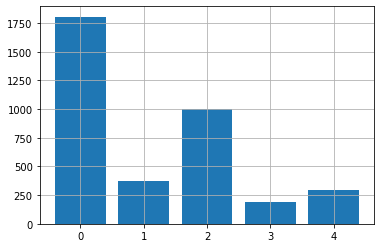

In [ ]:
plot_bar(train_data['diagnosis'])

In [ ]:
list_flip = train_data[train_data['diagnosis'] != 0]

In [ ]:
X_train_org = add_flip_image(X_train_org, list_flip)
train_data = train_data.append(list_flip, ignore_index=True, sort=False)

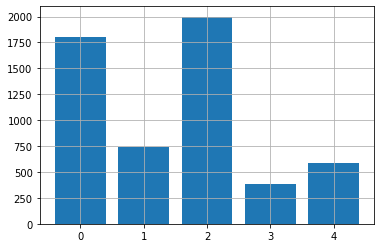

In [ ]:
plot_bar(train_data['diagnosis'])

In [ ]:
list_rot = train_data[(train_data['diagnosis'] != 0)&
                      (train_data['diagnosis'] != 2)]

In [ ]:
X_train_org = add_rot_image(X_train_org, list_rot)
train_data = train_data.append(list_rot, ignore_index=True, sort=False)

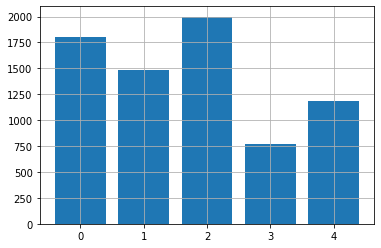

In [ ]:
plot_bar(train_data['diagnosis'])

In [ ]:
list_zoom = train_data[(train_data['diagnosis'] == 3)|
                       (train_data['diagnosis'] == 4)]

In [ ]:
X_train_org = add_zoom_image(X_train_org, list_zoom)
train_data = train_data.append(list_zoom, ignore_index=True, sort=False)

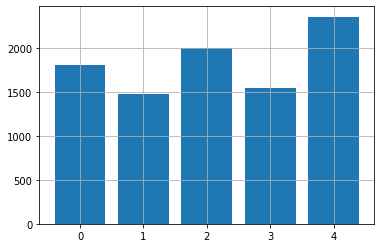

In [ ]:
plot_bar(train_data['diagnosis'])


In [ ]:
num_val = (train_data['diagnosis'].value_counts()).min()
list_new = []
for i in range(num_classes):
    temp = random.choices(train_data[train_data['diagnosis']==i].index, k=num_val)
    list_new.extend(temp)
train_data = train_data.loc[list_new]
X_train_org = X_train_org[list_new]

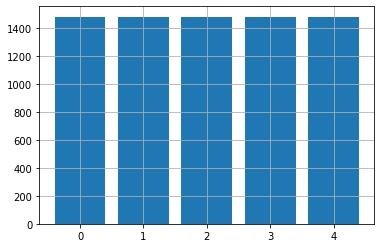

In [ ]:
plot_bar(train_data['diagnosis'])

In [ ]:
train_data['multilabel'] = train_data['diagnosis'].apply(get_multilabel)

In [ ]:
category =['0','1','2','3','4']
MLB = MultiLabelBinarizer(category)
y_train_org_multi = MLB.fit_transform(train_data['multilabel']).astype('float32')

In [ ]:
class_weight = dict(zip(range(0, num_classes), (((train_data['diagnosis'].value_counts()).sort_index())/len(train_data)).tolist()))

In [ ]:
df_train=pd.read_csv("/content/gdrive/MyDrive/DIP/train.csv")
df_test=pd.read_csv("/content/gdrive/MyDrive/DIP/test.csv")

In [ ]:
x=df_train["id_code"]
y=df_train["diagnosis"]

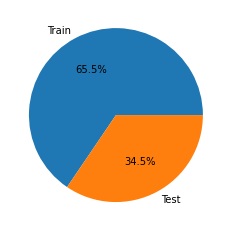

In [ ]:
labels=["Train","Test"]
sizes=[len(df_train),len(df_test)]

plt.pie(sizes,labels=labels,autopct='%1.1f%%')
plt.show()

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=42)
print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3112,)
x_test shape:  (550,)
y_train shape:  (3112,)
y_test shape:  (550,)


In [ ]:

fig = plt.figure(figsize=(20, 16))
for i in sorted(y_train.unique()):
    for j, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == i].sample(3, random_state=42).iterrows()):
        ax = fig.add_subplot(5, 3, i * 3 + j + 1, xticks=[], yticks=[])
        path=f"/content/gdrive/MyDrive/DIP/train_imagesf/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        plt.imshow(image)
        ax.set_title('Label: %d-%d-%s' % (i, idx, row['id_code']) )
        

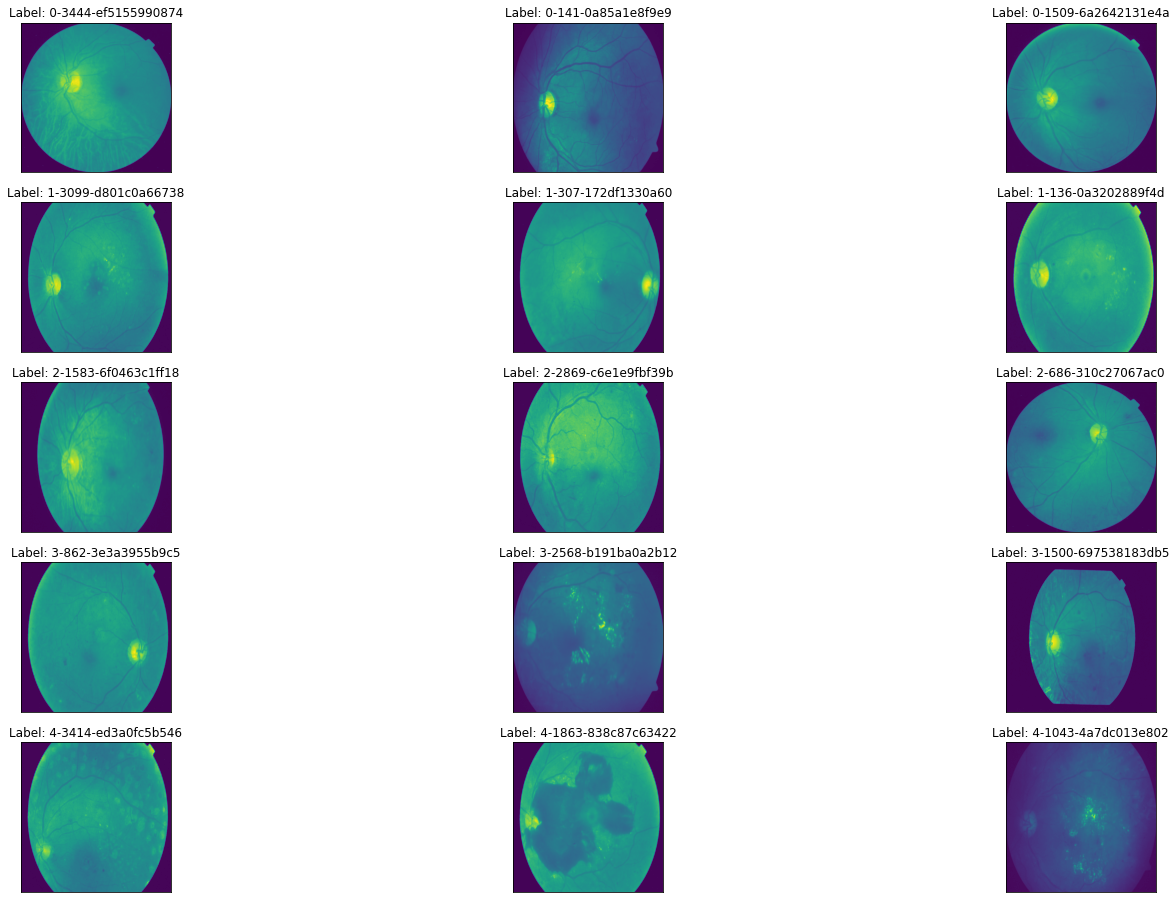

In [ ]:
fig=plt.figure(figsize=(25,16))
for i in sorted(y_train.unique()):
    for j ,(idx,row) in enumerate(df_train.loc[df_train["diagnosis"]==i].sample(5,random_state=42).iterrows()):
        ax = fig.add_subplot(5, 5, i*5+j+1, xticks=[], yticks=[])
        path=f"/content/gdrive/MyDrive/DIP/train_imagesf/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image)
        ax.set_title('Label: %d-%d-%s' % (i, idx, row['id_code']) )

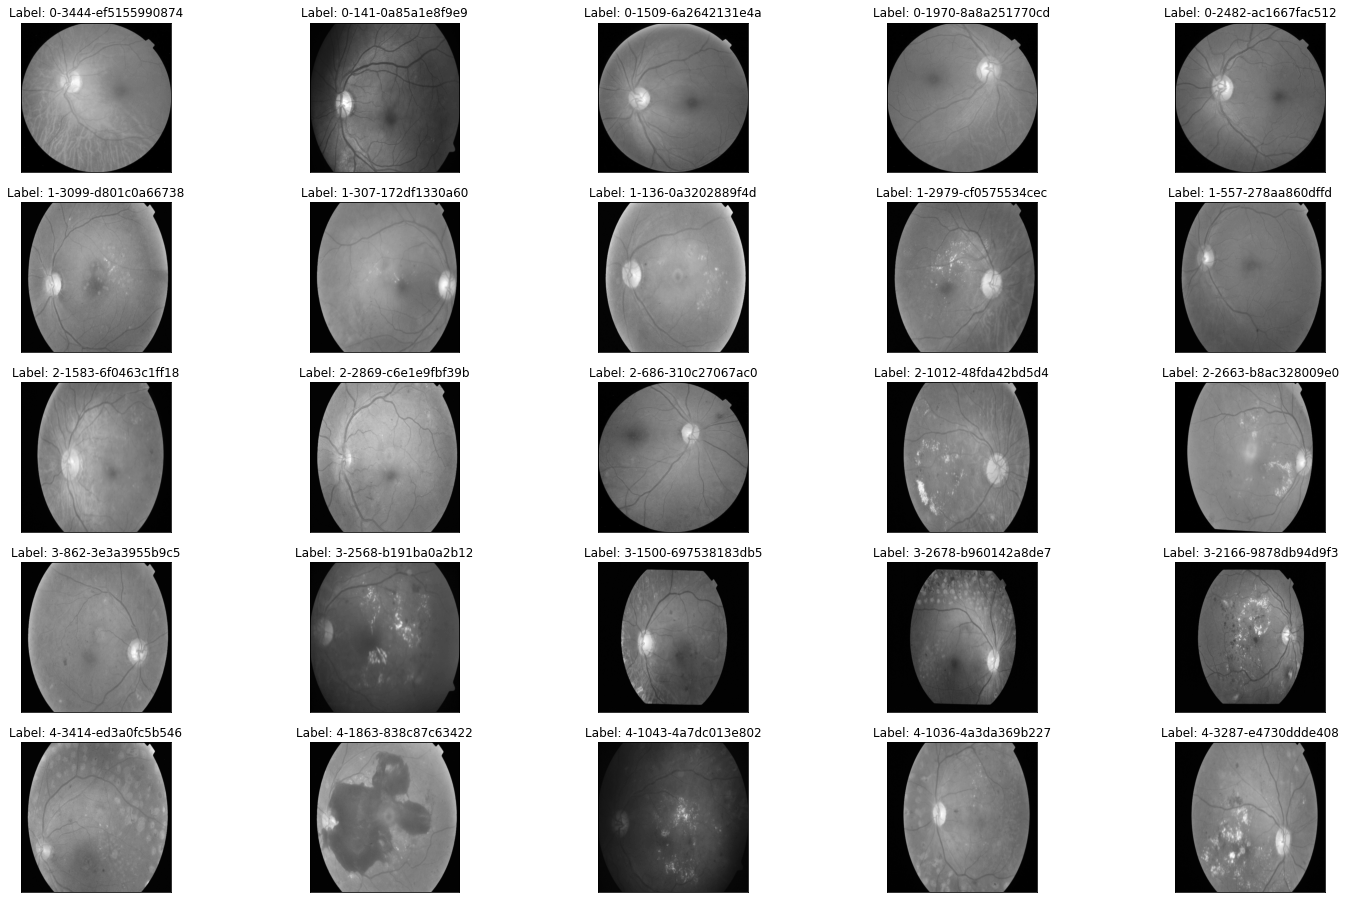

In [ ]:
fig=plt.figure(figsize=(25,16))
for i in sorted(y_train.unique()):
    for j ,(idx,row) in enumerate(df_train.loc[df_train["diagnosis"]==i].sample(5,random_state=42).iterrows()):
        ax = fig.add_subplot(5, 5, i*5+j+1, xticks=[], yticks=[])
        path=f"/content/gdrive/MyDrive/DIP/train_imagesf/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

        plt.imshow(image,cmap="gray")
        ax.set_title('Label: %d-%d-%s' % (i, idx, row['id_code']) )


1736 2416


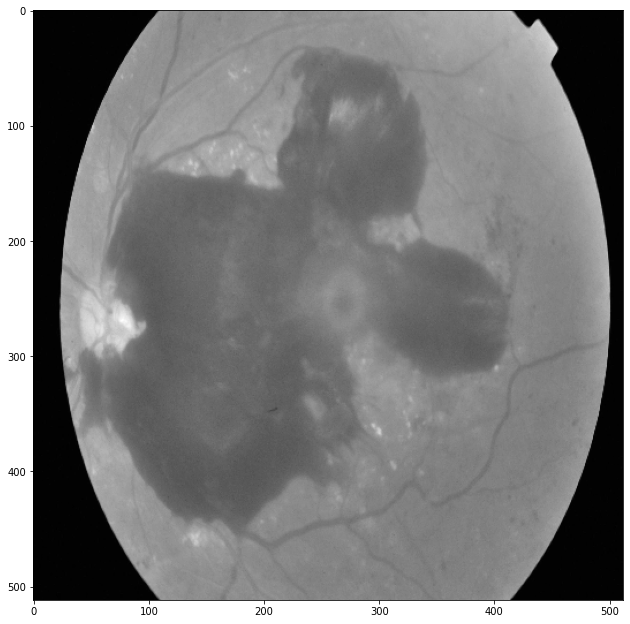

In [ ]:
dpi=80

path=f"/content/gdrive/MyDrive/DIP/train_imagesf/838c87c63422.png"
image = cv2.imread(path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
height,width=image.shape
print(height,width)
SCALE=2
figsize=(width/float(dpi))/SCALE,(height/float(dpi))/SCALE
image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
fig=plt.figure(figsize=figsize)
plt.imshow(image,cmap="gray")

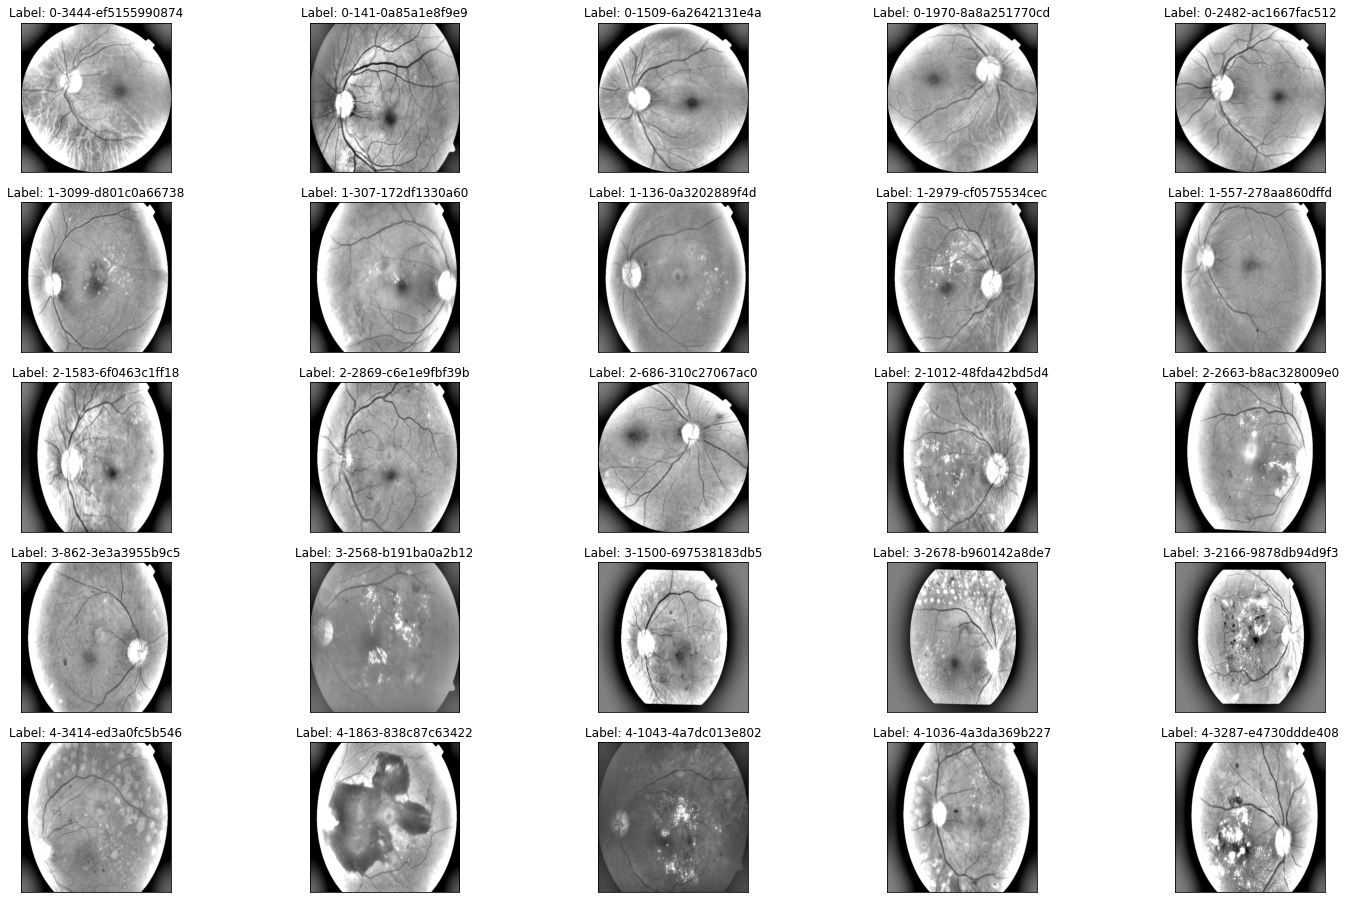

In [ ]:
fig=plt.figure(figsize=(25,16))
for i in sorted(y_train.unique()):
    for j,(idx,row) in enumerate(df_train.loc[df_train["diagnosis"]==i].sample(5,random_state=42).iterrows()):
        
        ax = fig.add_subplot(5, 5, i*5+j+1, xticks=[], yticks=[])
        path=f"/content/gdrive/MyDrive/DIP/train_imagesf/{row['id_code']}.png"
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , IMG_SIZE/10) ,-4 ,128) 

        plt.imshow(image, cmap='gray')
        ax.set_title('Label: %d-%d-%s' % (i, idx, row['id_code']) )

In [ ]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [ ]:
def load_ben_color(path, sigmaX=10):
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
    image=cv2.addWeighted ( image,4, cv2.GaussianBlur( image , (0,0) , sigmaX) ,-4 ,128)
        
    return image

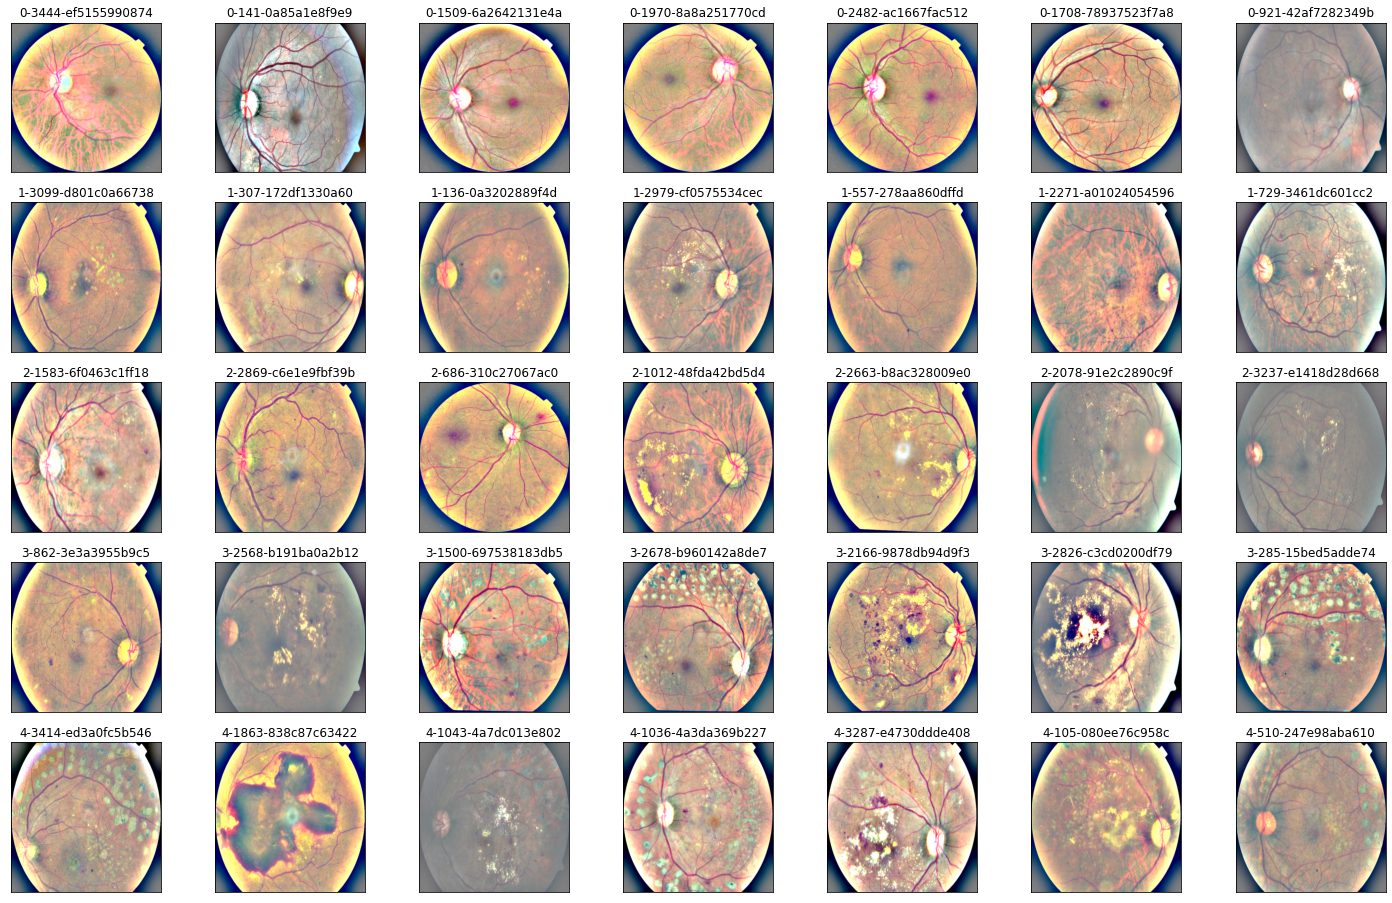

In [ ]:
NUM_SAMP=7
fig = plt.figure(figsize=(25, 16))
for i in sorted(y_train.unique()):
    for j, (idx, row) in enumerate(df_train.loc[df_train['diagnosis'] == i].sample(NUM_SAMP, random_state=42).iterrows()):
        ax = fig.add_subplot(5, NUM_SAMP, i* NUM_SAMP + j + 1, xticks=[], yticks=[])
        path=f"/content/gdrive/MyDrive/DIP/train_imagesf/{row['id_code']}.png"
        image = load_ben_color(path,sigmaX=30)

        plt.imshow(image)
        ax.set_title('%d-%d-%s' % (i, idx, row['id_code']) )

In [ ]:
train=pd.read_csv("/content/gdrive/MyDrive/DIP/train.csv")

In [ ]:
train.head()

id_code  diagnosis
0  000c1434d8d7          2
1  001639a390f0          4
2  0024cdab0c1e          1
3  002c21358ce6          0
4  005b95c28852          0

In [ ]:
patient=train[train["diagnosis"]==4]
healt=train[train["diagnosis"]==0]
train_df=pd.concat([patient,healt])

In [ ]:
train_df["diagnosis"]=[1 if i==4 else 0 for i in train_df.diagnosis]

In [ ]:
train_df.shape

(2100, 2)

In [ ]:
x=train_df.drop(columns=["diagnosis"])
y=train_df.diagnosis

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
dn_x = [ Image.open('/content/gdrive/MyDrive/DIP/train_imagesf/'+i+'.png') for i in x_train.id_code[:5]]

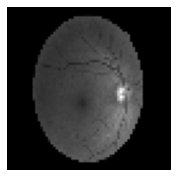

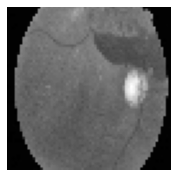

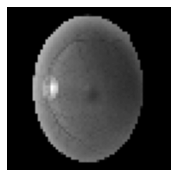

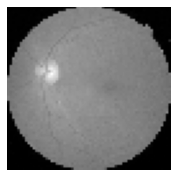

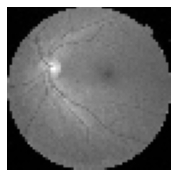

In [ ]:
for i in dn_x:
    
    plt.figure(figsize=(5,3))
    i = cv2.resize(np.asarray(i),(64,64))
    i= cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    plt.imshow(i,cmap="gray")
    plt.axis("off")
    plt.show

In [ ]:
x_train = [cv2.resize(np.asarray(Image.open('/content/gdrive/MyDrive/DIP/train_imagesf/'+i+'.png').convert("L")),(64,64)) for i in x_train.id_code]

In [ ]:
x_test = [cv2.resize(np.asarray(Image.open('/content/gdrive/MyDrive/DIP/train_imagesf/'+i+'.png').convert("L")),(64,64)) for i in x_test.id_code]

In [ ]:
x_test=np.array(x_test)
x_test.shape

(630, 64, 64)

In [ ]:
x_train=np.array(x_train)
x_train.shape

(1470, 64, 64)

In [ ]:
x_train_flatten=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test_flatten=x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])

In [ ]:
x_train=x_train_flatten.T
y_train=y_train.T
x_test=x_test_flatten.T
y_test=y_test.T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (4096, 1470)
x_test:  (4096, 630)
y_train:  (1470,)
y_test:  (630,)


In [ ]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

y_train:  (1470, 1)
y_test:  (630, 1)


In [ ]:
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

In [ ]:
def sigmoid(z):
    # sigmoid function is 1/(1+e^-z)
    y_head=1/(1+np.exp(-z))
    return y_head

In [ ]:
def forward_propagation(w,b,x_train,y_train):
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    return cost

In [ ]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z=np.dot(w.T,x_train)+b
    y_head=sigmoid(z)
    loss=-y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost=(np.sum(loss))/x_train.shape[1]
    #backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]
    gradients={"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    return cost,gradients
    

In [ ]:

def update(w,b,x_train,y_train,learning_rate,number_of_iteration):
    cost_list=[]
    cost_list2=[]
    index=[]
    for i in range(number_of_iteration):
        cost,gradients=forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        w=w-learning_rate*gradients["derivative_weight"]
        b=b-learning_rate*gradients["derivative_bias"]
    parameters ={"weight":w,"bias":b}
    
    return parameters,gradients,cost_list

In [ ]:
# prediction
def predict(w,b,x_test):
    z=sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction=np.zeros((1,x_test.shape[1]))
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            Y_prediction[0,i]=0
        else:
            Y_prediction[0,i]=1
    return Y_prediction  

In [ ]:
# Logistic regression initialize
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,num_iterations):
    dimension=x_train.shape[0]
    w,b=initialize_weights_and_bias(dimension)
    parameters,gradients,cost_list=update(w,b,x_train,y_train,learning_rate,num_iterations)
    y_prediction_test=predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train=predict(parameters["weight"],parameters["bias"],x_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 50)

train accuracy: 85.71428571428572 %
test accuracy: 86.5079365079365 %


In [ ]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train).score(x_test.T, y_test)))

test accuracy: 0.9492063492063492 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time as t
import cv2
import warnings
import shutil
import os

# Sklearn utils.
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle

# Keras.
from keras.applications.resnet50 import ResNet50
from keras.applications import DenseNet121
from keras.utils import Sequence
from keras.layers import Dense, Dropout, Flatten, Input, ZeroPadding2D, GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras import optimizers
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import tensorflow as tf

In [ ]:
import os
import shutil
import re
import math

import pandas as pd
import numpy as np

import PIL.Image
import cv2

from random import shuffle
from glob import glob

from sklearn.model_selection import train_test_split

#from tensorflow.python.keras.applications import VGG16

from keras.applications import VGG16

from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

from tensorflow import keras
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

from keras import models
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

from keras.optimizers import Adam

In [ ]:
base_image_dir = os.path.join( '/content/gdrive/MyDrive/DIP/')
train_dir = os.path.join(base_image_dir,'train_imagesf/')
df = pd.read_csv(os.path.join(base_image_dir, 'train.csv'))
df['path'] = df['id_code'].map(lambda x: os.path.join(train_dir,'{}.png'.format(x)))
df = df.drop(columns=['id_code'])
df = df.sample(frac=1).reset_index(drop=True) #shuffle dataframe
df.head(10)

diagnosis                                               path
0          0  /content/gdrive/MyDrive/DIP/train_imagesf/f9e1...
1          0  /content/gdrive/MyDrive/DIP/train_imagesf/88e5...
2          0  /content/gdrive/MyDrive/DIP/train_imagesf/79ad...
3          2  /content/gdrive/MyDrive/DIP/train_imagesf/5103...
4          0  /content/gdrive/MyDrive/DIP/train_imagesf/a0e6...
5          0  /content/gdrive/MyDrive/DIP/train_imagesf/6e09...
6          0  /content/gdrive/MyDrive/DIP/train_imagesf/242f...
7          0  /content/gdrive/MyDrive/DIP/train_imagesf/3b98...
8          0  /content/gdrive/MyDrive/DIP/train_imagesf/9c89...
9          1  /content/gdrive/MyDrive/DIP/train_imagesf/b07b...

In [ ]:
df.diagnosis.value_counts()

0    1805
2     999
1     370
4     295
3     193
Name: diagnosis, dtype: int64

In [ ]:
image_train, image_test, y_train, y_test = train_test_split(np.array(df.path), 
                                                            np.array(df.diagnosis), 
                                                            test_size=0.3,
                                                            random_state=123, 
                                                            stratify=df.diagnosis)

In [ ]:
image_train.shape

(2563,)

In [ ]:
image_and_class_train = dict(zip(image_train, y_train))
image_and_class_test = dict(zip(image_test, y_test))

In [ ]:
IMG_SIZE = (224, 224)  
NUM_CLASSES = 5     

In [ ]:
def crop_image_from_gray(img,tol=7):
    if img.ndim ==2:
        mask = img>tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    elif img.ndim==3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img>tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
    #         print(img1.shape,img2.shape,img3.shape)
            img = np.stack([img1,img2,img3],axis=-1)
    #         print(img.shape)
        return img

In [ ]:
def circle_crop(path, img_size=(224,224), sigmaX=10):   
    """
    Create circular crop around image centre    
    """    
    
    img = cv2.imread(path)
    img = crop_image_from_gray(img)    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    height, width, depth = img.shape    
    
    x = int(width/2)
    y = int(height/2)
    r = np.amin((x,y))
    
    circle_img = np.zeros((height, width), np.uint8)
    cv2.circle(circle_img, (x,y), int(r), 1, thickness=-1)
    img = cv2.bitwise_and(img, img, mask=circle_img)
    img = crop_image_from_gray(img)
    img = cv2.addWeighted ( img,4, cv2.GaussianBlur( img , (0,0) , sigmaX) ,-4 ,128)
    img = cv2.resize(img, img_size)
    return preprocess_input(img) 

In [ ]:

def load_image(path, target_size=IMG_SIZE):
    img = load_img(path, target_size=target_size)   
    array = img_to_array(img)
    return preprocess_input(array) 

In [ ]:
def fit_generator(files, batch_size=32):
    while True:
        shuffle(files)
        for k in range(math.ceil(len(files) / batch_size)):  
            i = k * batch_size                                              
            j = i + batch_size
            if j > len(files):
                j = len(files)
                
           
            x = np.array([circle_crop(path) for path in files[i:j]]) 
            
            label = np.array([image_and_class_train[path] for path in files[i:j]])  
            y = keras.utils.to_categorical(label, num_classes=NUM_CLASSES)    
            yield (x, y)

In [ ]:
def predict_generator(files):
    while True:
        for path in files:
            
            
            yield np.array([circle_crop(path)])

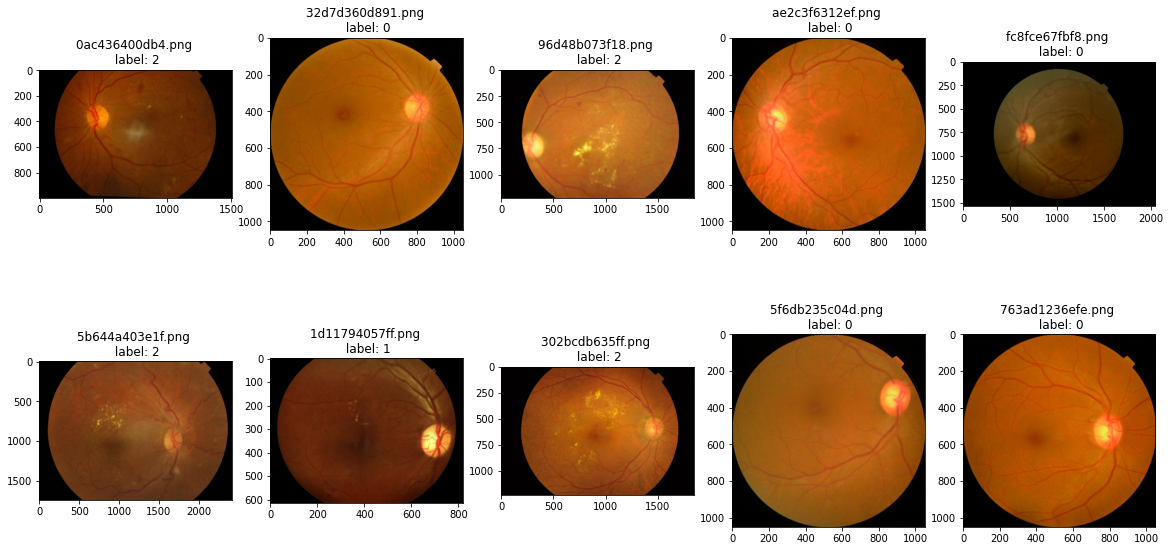

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, path in enumerate(image_train[:10], 1):
    subplot = fig.add_subplot(2, 5, i)
    
     
    plt.imshow(plt.imread(path));
    

    subplot.set_title('{} \n label: {}'.format(os.path.basename(path), image_and_class_train[path]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

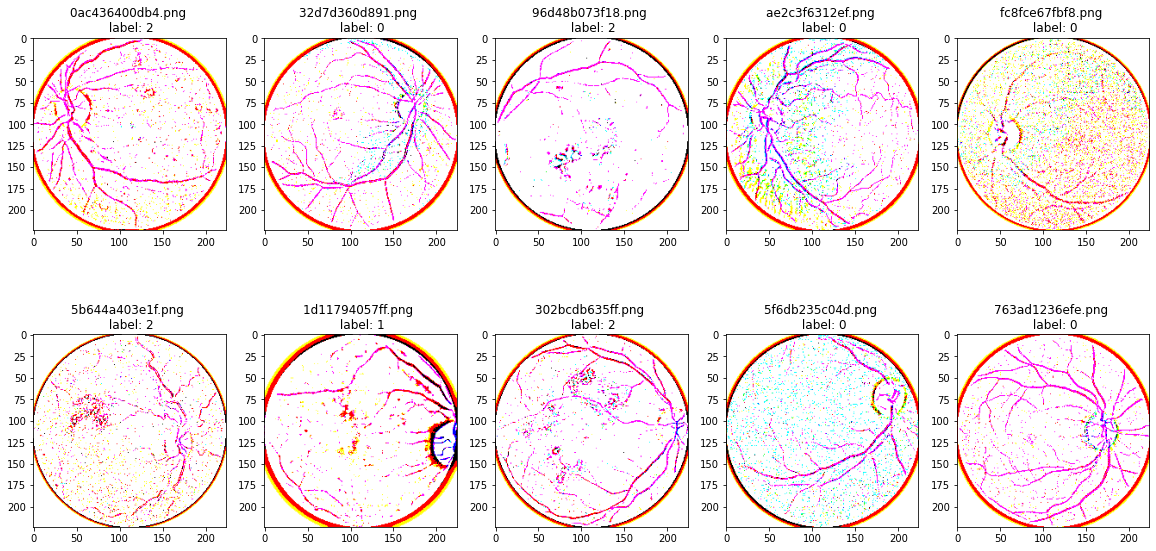

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 10))
for i, path in enumerate(image_train[:10], 1):
    subplot = fig.add_subplot(2, 5, i)
    
    
    image = circle_crop(path,sigmaX=10)
    plt.imshow(image)

    subplot.set_title('{} \n label: {}'.format(os.path.basename(path), image_and_class_train[path]))

In [ ]:
conv_base = VGG16(include_top=False, weights='imagenet', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv3':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
model_2 = models.Sequential()
model_2.add(conv_base) 
model_2.add(layers.BatchNormalization())
model_2.add(layers.Flatten())
#model_1.add(layers.Dense(512, activation='relu'))
model_2.add(layers.Dense(NUM_CLASSES, activation='softmax'))
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 512)         2048      
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 5)                 125445    
Total params: 14,842,181
Trainable params: 2,486,277
Non-trainable params: 12,355,904
_________________________________________________________________


In [ ]:
from keras import metrics

In [ ]:
model_2.compile(optimizer=Adam(lr=0.001), 
              loss='categorical_crossentropy',  
              metrics=['accuracy', 'categorical_accuracy', metrics.Precision(), metrics.Recall(), metrics.AUC()])

In [ ]:
shuffle(image_train)   

train_val_split = 100   

validation_data = next(fit_generator(image_train[:train_val_split], train_val_split))

 
history = model_2.fit_generator(fit_generator(image_train[train_val_split:]),  
        steps_per_epoch=10,   
        epochs=100,   
        validation_data=validation_data,
        callbacks=[ #EarlyStopping(patience = 5),
                   ModelCheckpoint(filepath='the_least_loss_new_preproc_gpu.h5',
                                  verbose=1,
                                  save_best_only=True)])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
10/10 [==============================] - ETA: 0s - loss: 3.9618 - accuracy: 0.5094 - categorical_accuracy: 0.5094 - precision: 0.5372 - recall: 0.4969 - auc: 0.7715 
Epoch 00001: val_loss improved from inf to 17.07977, saving model to the_least_loss_new_preproc_gpu.h5
10/10 [==============================] - 303s 30s/step - loss: 3.9618 - accuracy: 0.5094 - categorical_accuracy: 0.5094 - precision: 0.5372 - recall: 0.4969 - auc: 0.7715 - val_loss: 17.0798 - val_accuracy: 0.3000 - val_categorical_accuracy: 0.3000 - val_precision: 0.3000 - val_recall: 0.3000 - val_auc: 0.5656
Epoch 2/100
10/10 [==============================] - ETA: 0s - loss: 1.5457 - accuracy: 0.6438 - categorical_accuracy: 0.6438 - precision: 0.6465 - recall: 0.6344 - auc: 0.8708 
Epoch 00002: val_loss improved from 17.07977 to 6.17360, saving model to the_least_loss_new_preproc_gpu.h5
10/10 [==============================] - 396s 